This is a google colab notebook that shows how to run a simple model fit between a given input or feature list and a given output or label list.

It's recommended that this file can be opened with Google Colab because then it requires no tensorflow/library installation. With that said, let's dive right into it.

First we load are necessary libraries as follows

In [1]:
import tensorflow as tf
import numpy as np
import logging
logger = tf.get_logger() # These two lines simply tells the system to only display errors
logger.setLevel(logging.ERROR)

Now we can collect input from the user. This script is meant as a low level example to understand tensorflow basics so doesnt intend to work with large datasets however the implementation would be no different. 

In [2]:
feature_list = []
n = int(input('Enter number of feature-label pairs available:'))


Enter number of feature-label pairs available:5


In [3]:
for i in range(0, n):
  ele = int(input())
  feature_list.append(ele)
#print("{} is the feature list".format(feature_list))

1
2
3
4
5
[1, 2, 3, 4, 5] is the feature list


Now we do the same to collect labels/outputs

In [5]:
print("Enter outputs/labels in the same order")
label_list = []
for i in range(0, n):
  ele = int(input())
  label_list.append(ele)
#print("{} is the feature list".format(label_list))
feature_list_a = np.array(feature_list,dtype = float)
label_list_a = np.array(label_list,dtype = float)
for i,c in enumerate(feature_list_a):
  print("Input = {} | Output = {}".format(c,label_list_a[i]))

Enter outputs/labels in the same order
0
1
1
2
3
Input = 1.0 | Output = 0.0
Input = 2.0 | Output = 1.0
Input = 3.0 | Output = 1.0
Input = 4.0 | Output = 2.0
Input = 5.0 | Output = 3.0


Now that we have a dataset ready, we begin creating the model. We'll use the keras API to build a layer for our problem. This would be a single layer and the number of neurons and inputs is specified

In [6]:
l0 = tf.keras.layers.Dense(units = 1, input_shape = [1])

After making the layers as above, we assemble them into a model as shown

In [7]:
model = tf.keras.Sequential([l0]) # if using multiple layers edit this parameter as a list of layers

We then compile the model with loss and optimizer functions. Loss function allows us to measure how off are we from the given output (forward sweep) and optmizer function defines the method of how we change/tune our parameters/neurons (backward propogation). We are using mean squared error as the loss function and Adam as optimizer with learning rate 0.1 (it can be anywhere between 0.001(default) and 0.1)

In [8]:
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(0.1))

We train the model with the data we recieved in the beginning using fit method

In [9]:
history = model.fit(feature_list_a,label_list_a,epochs=500,verbose=False)
print("Model training is finished")

Model training is complete


We can display training statistics using matplotlib

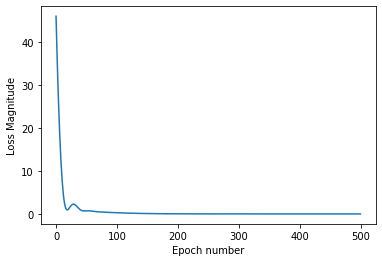

In [10]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

Now lets try to predict output by getting an input from the user

In [11]:
testinput = int(input('Enter a number as an input for the model:'))
print("{} is the predicted output".format(model.predict([testinput])))

Enter a number as an input for the model:3
[[1.4000309]] is the predicted output


To look at the trained model's layer weights we can do

In [12]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[0.6999372]], dtype=float32), array([-0.6997807], dtype=float32)]
